### Установка библиотек

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime as dt
import os

plt.style.use('ggplot')



In [23]:
ASSETS_DIR = 'assets'

os.makedirs(ASSETS_DIR, exist_ok=True)

### Загрузка данных

In [2]:
data = pd.read_csv('bank_products.csv')

/tmp/ipykernel_13637/2779979137.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('bank_products.csv')


In [3]:
data.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
data.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

## Preprocessing

### Обработка пропусков

In [5]:
data.isna().sum() / data.shape[0]

fecha_dato               0.000000
ncodpers                 0.000000
ind_empleado             0.002032
pais_residencia          0.002032
sexo                     0.002037
age                      0.000000
fecha_alta               0.002032
ind_nuevo                0.002032
antiguedad               0.000000
indrel                   0.002032
ult_fec_cli_1t           0.998183
indrel_1mes              0.010975
tiprel_1mes              0.010975
indresi                  0.002032
indext                   0.002032
conyuemp                 0.999868
canal_entrada            0.013638
indfall                  0.002032
tipodom                  0.002032
cod_prov                 0.006858
nomprov                  0.006858
ind_actividad_cliente    0.002032
renta                    0.204756
segmento                 0.013876
ind_ahor_fin_ult1        0.000000
ind_aval_fin_ult1        0.000000
ind_cco_fin_ult1         0.000000
ind_cder_fin_ult1        0.000000
ind_cno_fin_ult1         0.000000
ind_ctju_fin_u

Наибольшая доля пропусков у фичей: **ult_fec_cli_1t и conyuemp**  
**ult_fec_cli_1t** - последняя дата, когда клиент был премиальным. Можно трансформировать фичу в количество дней с даты, когда клиент был премиальным, тогда для текущих премиальных клиентов данная фича будет равна нулю.  
**conyuemp** - 1, если клиент супруг(а) работника. Можно заполнить пропуски нулями.

In [6]:
data['days_from_premium'] = data['ult_fec_cli_1t'].apply(lambda x: dt.today() - pd.to_datetime(x) if not pd.isna(x) else x) 

In [7]:
data[data['days_from_premium'].notna()]['days_from_premium'].describe()

count                           24793
mean     3561 days 10:50:11.028483520
std       102 days 14:52:34.082838185
min         3368 days 20:55:07.482112
25%         3478 days 20:55:05.775184
50%      3562 days 20:55:02.053054976
75%      3669 days 20:54:59.791825984
max         3702 days 20:54:59.351916
Name: days_from_premium, dtype: object

In [8]:
data['days_from_premium'] = data.apply(lambda x: 0 if x['indrel_1mes'] == 1 else x['days_from_premium'], axis=1)

In [9]:
data['conyuemp'].fillna(0, inplace=True)

In [10]:
data.isna().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                        0
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

In [11]:
data['fecha_dato'] = pd.to_datetime(data['fecha_dato'])

In [12]:
data.rename(columns={"fecha_dato":"div_data", "ncodpers": "client_id", "ind_empleado": "empl_status", "pais_residencia": "country",
                     "sexo": "sex", "fecha_alta": "first_contract_date", "ind_nuevo": "is_last_6m_contract", "antiguedad": "work_expirience",
                     "indrel": "is_new_client", "ult_fec_cli_1t": "last_premium_date", "indrel_1mes": "client_type",
                     "tiprel_1mes": "activity_type", "indresi": "is_resident", "indext": "not_resident", "conyuemp": "has_bank_spouse",
                     "canal_entrada": "acquisition_channel", "indfall": "is_acc_actual", "tipodom": "adress_type",
                     "cod_prov": "region", "nomprov": "region_name", "ind_actividad_cliente": "is_active", "renta": "income",
                     "segmento": "segment",
                     "ind_ahor_fin_ult1": "acc_savings",
                     "ind_aval_fin_ult1": "acc_garant",
                     "ind_cco_fin_ult1": "acc_current",
                     "ind_cder_fin_ult1": "acc_derivative",
                     "ind_cno_fin_ult1": "acc_salary",
                     "ind_ctju_fin_ult1": "acc_child",
                     "ind_ctop_fin_ult1": "acc_spec1",        
                     "ind_ctma_fin_ult1": "acc_spec3",
                     "ind_ctpp_fin_ult1": "acc_spec2",
                     "ind_deco_fin_ult1": "acc_short_deposit",
                    "ind_deme_fin_ult1": "acc_middle_deposit",
                    "ind_dela_fin_ult1": "acc_long_deposit",
                    "ind_ecue_fin_ult1": "acc_digital",
                    "ind_fond_fin_ult1": "acc_cash",
                    "ind_hip_fin_ult1": "acc_mortgage",
                    "ind_plan_fin_ult1": "acc_pension",
                    "ind_pres_fin_ult1": "acc_credit",
                    "ind_reca_fin_ult1": "acc_tax",
                    "ind_tjcr_fin_ult1": "acc_credit_cart",
                    "ind_valo_fin_ult1": "acc_securities",
                    "ind_viv_fin_ult1": "acc_home",
                    "ind_nomina_ult1": "acc_salary_payment",
                    "ind_nom_pens_ult1": "acc_pension_loans",
                    "ind_recibo_ult1": "acc_debit"}, inplace=True)

In [13]:
data['income'].fillna(np.nanmedian(data['income']), inplace=True)

In [14]:
data[data['sex'].isna()].isna().sum()

div_data                   0
client_id                  0
empl_status            27734
country                27734
sex                    27804
age                        0
first_contract_date    27734
is_last_6m_contract    27734
work_expirience            0
is_new_client          27734
last_premium_date      27804
client_type            27734
activity_type          27734
is_resident            27734
not_resident           27734
has_bank_spouse            0
acquisition_channel    27735
is_acc_actual          27734
adress_type            27734
region                 27734
region_name            27734
is_active              27734
income                     0
segment                27735
acc_savings                0
acc_garant                 0
acc_current                0
acc_derivative             0
acc_salary                 0
acc_child                  0
acc_spec3                  0
acc_spec1                  0
acc_spec2                  0
acc_short_deposit          0
acc_middle_dep

Клиенты с незаполненным атрибутом sex имеют много пропусков, такие данные можно удалить

In [15]:
data = data[data['sex'].notna()]

In [16]:
data['activity_type'].fillna('P', inplace=True)

In [17]:
data['acquisition_channel'].fillna('other', inplace=True)

In [18]:
data['region'].fillna(0, inplace=True)
data['region_name'].fillna('NO_DATA', inplace=True)
data['segment'].fillna('00 - NO SEGMENT', inplace=True)
data['acc_salary_payment'] = data['acc_salary_payment'].fillna(0).astype(int)
data['acc_pension_loans'] = data['acc_pension_loans'].fillna(0).astype(int)

In [ ]:
data['work_expirience'].replace(-999999, 0, inplace=True)
data['is_new_client'].replace(99, 0, inplace=True)

### Определение типов данных

In [19]:
data['age'] = data['age'].astype('int')
data['work_expirience'] = data['work_expirience'].astype('int')
data['client_type'] = data['client_type'].astype(str)
data['has_bank_spouse'] = data['has_bank_spouse'].astype(str)

In [20]:
# представляем days_from_premium в вид int
data['days_from_premium'] = data['days_from_premium'].apply(lambda x: x.days if not pd.isna(x) and x != 0 else x)

data['days_from_first_contract'] = dt.today() - pd.to_datetime(data['first_contract_date'])
data['days_from_first_contract'] = data['days_from_first_contract'].apply(lambda x: x.days)

In [21]:
data['has_bank_spouse'] = data['has_bank_spouse'].map({'S': 1, 'N': 0}).fillna(0)
data['is_acc_actual'] = data['is_acc_actual'].map({'S': 1, 'N': 0}).fillna(0)
data['is_resident'] = data['is_resident'].map({'S': 1, 'N': 0}).fillna(0)
data['is_male'] = data['sex'].map({'V': 1, 'H': 0}).astype(int)

In [22]:
data['has_bank_spouse'] = data['has_bank_spouse'].astype(int)
data['is_resident'] = data['is_resident'].astype(int)
data['is_acc_actual'] = data['is_acc_actual'].astype(int)
data['is_last_6m_contract'] = data['is_last_6m_contract'].astype(int)
data['is_new_client'] = data['is_new_client'].astype(int)
data['is_active'] = data['is_active'].astype(int)


In [23]:
data.drop(columns=['last_premium_date', 'first_contract_date', 'sex', 'not_resident', 'adress_type', 'region_name'], inplace=True)

In [16]:
data.to_parquet('bank_products_processed.parquet')

## EDA

In [2]:
# запускаем, если нужно
data = pd.read_parquet('bank_products_processed.parquet')


In [3]:
id_col = ['client_id']
num_features = ['age', 'work_expirience', 'income', 'days_from_first_contract', 'days_from_premium']
object_features = [el for el in data.select_dtypes(['object']).columns.tolist() if el not in num_features + id_col] + ['region']
cat_features = [col for col in data.select_dtypes(['int']).columns.tolist() if col not in num_features + object_features + id_col]



### Описательная статистика

In [4]:
for el in object_features:
    print(data[el].value_counts(), '\n')

empl_status
N    13610907
B        3566
F        2523
A        2492
S          17
Name: count, dtype: int64 

country
ES    13553657
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
ZW          11
DJ          11
JM          11
BM           6
MT           2
Name: count, Length: 118, dtype: int64 

client_type
1.0    11295301
1       2195311
nan      122047
3.0        3213
3          1137
P           873
2.0         834
2           483
4.0         236
4            70
Name: count, dtype: int64 

activity_type
I    7304864
A    6187065
P     126703
R        869
N          4
Name: count, dtype: int64 

acquisition_channel
KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
        ...   
KDI         17
025         11
KDL         11
KHS          5
KHR          1
Name: count, Length: 163, dtype: int64 

segment
02 - PARTICULARES     7960151
03 - UNIVERSITARIO    4935579
01 - TOP               562142
00 - NO SEGMENT        161633
Name: count, dt

In [5]:
data[num_features].describe()

,age,work_expirience,income,days_from_first_contract,days_from_premium
count,1.361950e+07,1.361950e+07,1.361950e+07,1.361950e+07,7.294035e+06
mean,4.018145e+01,7.938187e+01,1.276718e+05,6.034937e+03,7.975904e+00
std,1.718503e+01,6.637438e+01,2.062811e+05,2.041081e+03,1.677071e+02
min,2.000000e+00,0.000000e+00,1.202730e+03,3.367000e+03,0.000000e+00
25%,2.400000e+01,2.300000e+01,7.636503e+04,4.323000e+03,0.000000e+00
50%,3.900000e+01,5.000000e+01,1.018500e+05,5.101000e+03,0.000000e+00
75%,5.000000e+01,1.350000e+02,1.376258e+05,7.788000e+03,0.000000e+00
max,1.640000e+02,2.560000e+02,2.889440e+07,1.117300e+04,3.702000e+03


In [6]:
data[cat_features].sum() / data[cat_features].count()

is_last_6m_contract    0.059561
is_new_client          0.998180
is_resident            0.995165
has_bank_spouse        0.000001
is_acc_actual          0.002552
is_active              0.457809
acc_savings            0.000103
acc_garant             0.000023
acc_current            0.656275
acc_derivative         0.000394
acc_salary             0.080988
acc_child              0.009475
acc_spec3              0.009711
acc_spec1              0.129181
acc_spec2              0.043368
acc_short_deposit      0.001750
acc_middle_deposit     0.001664
acc_long_deposit       0.043042
acc_digital            0.082824
acc_cash               0.018514
acc_mortgage           0.005880
acc_pension            0.009185
acc_credit             0.002535
acc_tax                0.051897
acc_credit_cart        0.044463
acc_securities         0.025649
acc_home               0.003854
acc_salary_payment     0.054756
acc_pension_loans      0.059463
acc_debit              0.128110
is_male                0.545119
dtype: f

In [15]:
target_cols = [col for col in data.columns if col.startswith('acc_')]

Выводы по разделу:

1. Больше половины клиентов имеют текущие счета.
2. Только ~46% пользователей - активные.
3. Клиента банка в подавляющем большинстве из Испании.
4. Средний возраст клиентов - около 40 лет (медиана - 39, ср. арфим. - 40).
5. Среднее количество дней с подписания первого договора большое и в среднем.
6. Большинство клиентов имеют премиальный статус

### Графики

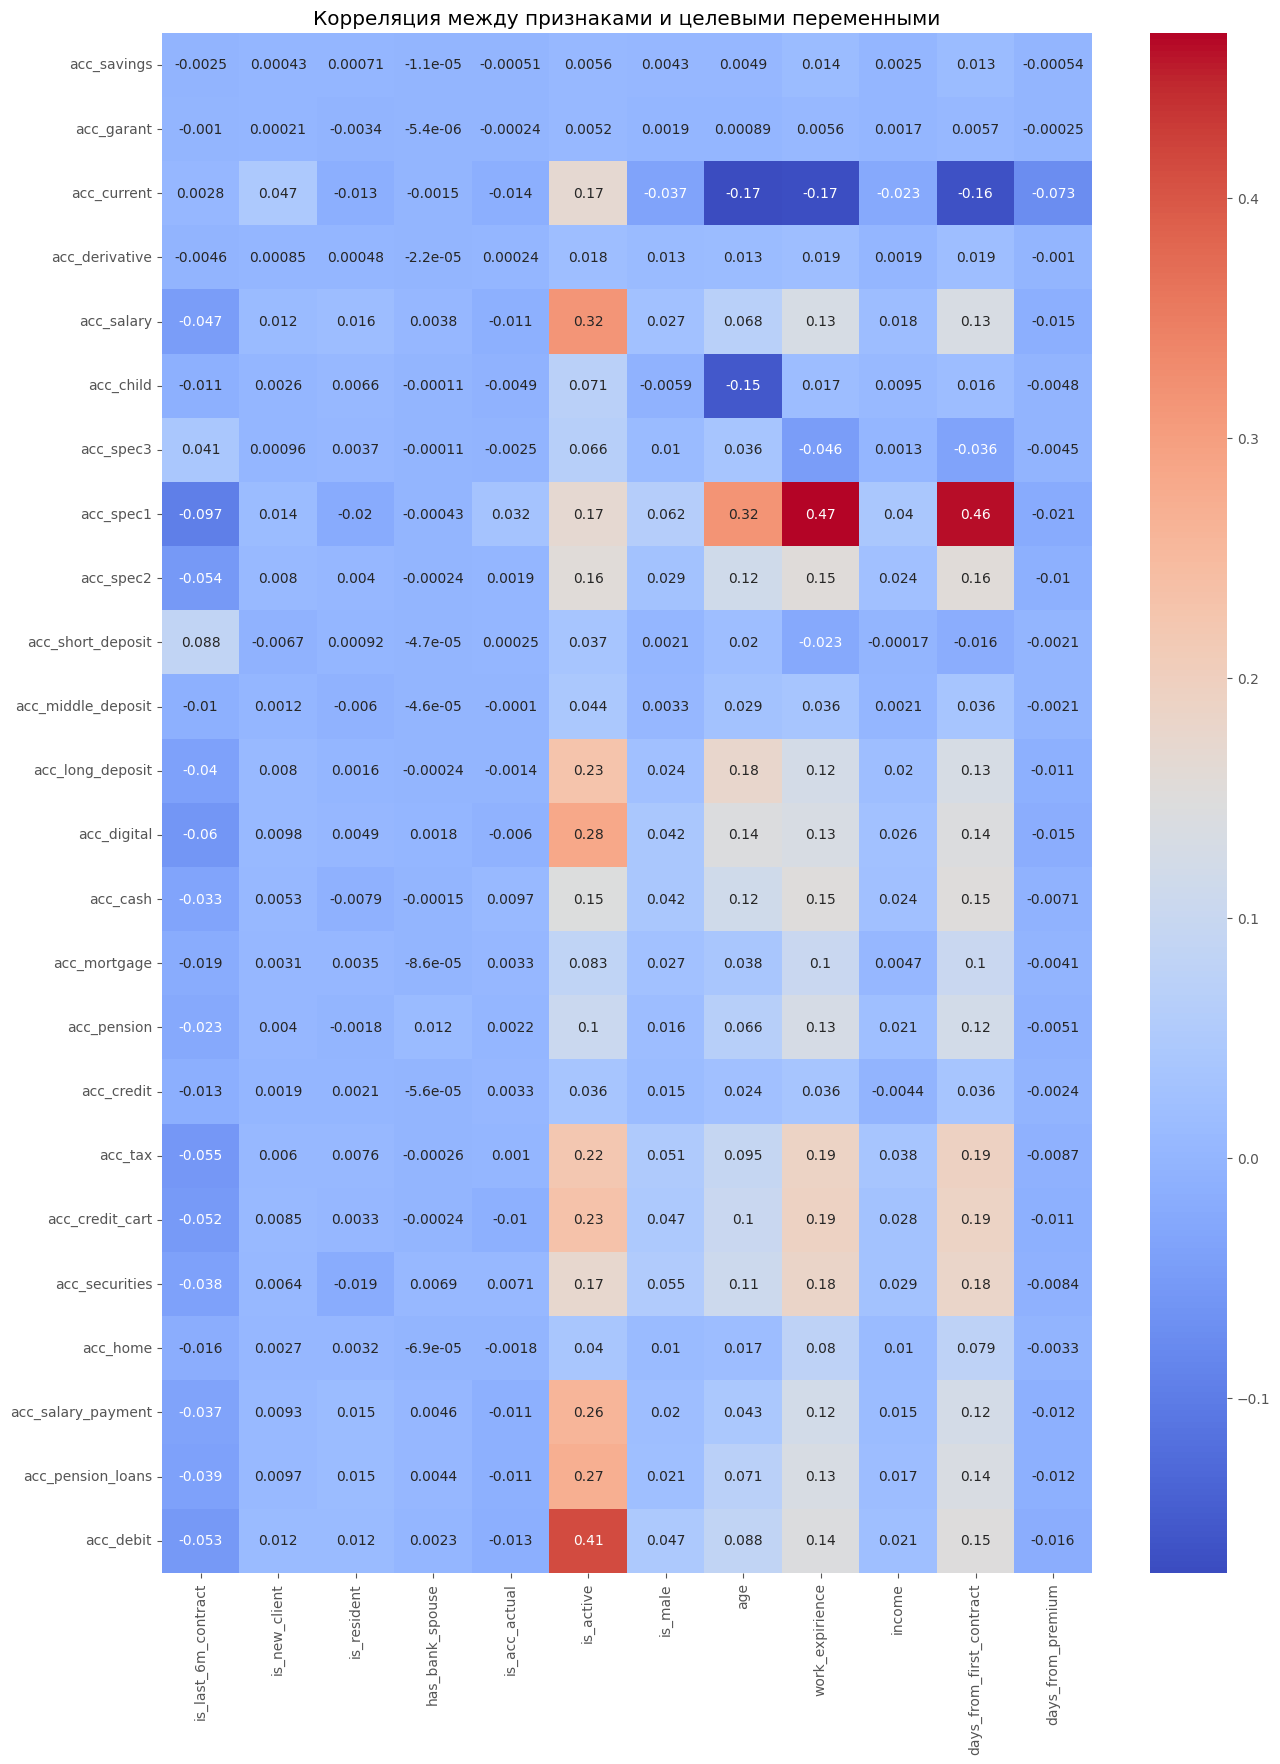

In [40]:
f,ax = plt.subplots(figsize=(15,20))
sns.heatmap(data[cat_features + num_features].corr().loc[[col for col in cat_features + num_features if col not in target_cols], target_cols].T, annot=True, cmap='coolwarm', ax=ax)
plt.title('Корреляция между признаками и целевыми переменными')
plt.savefig(os.path.join(ASSETS_DIR, 'correlation_cat_num_features.png'))
plt.show()


В корреляционной матрице видно, что признаки is_active, age и work_experienc, days_from_first_contract оказывают наиболее значимое влияние на наличие большинства счетов

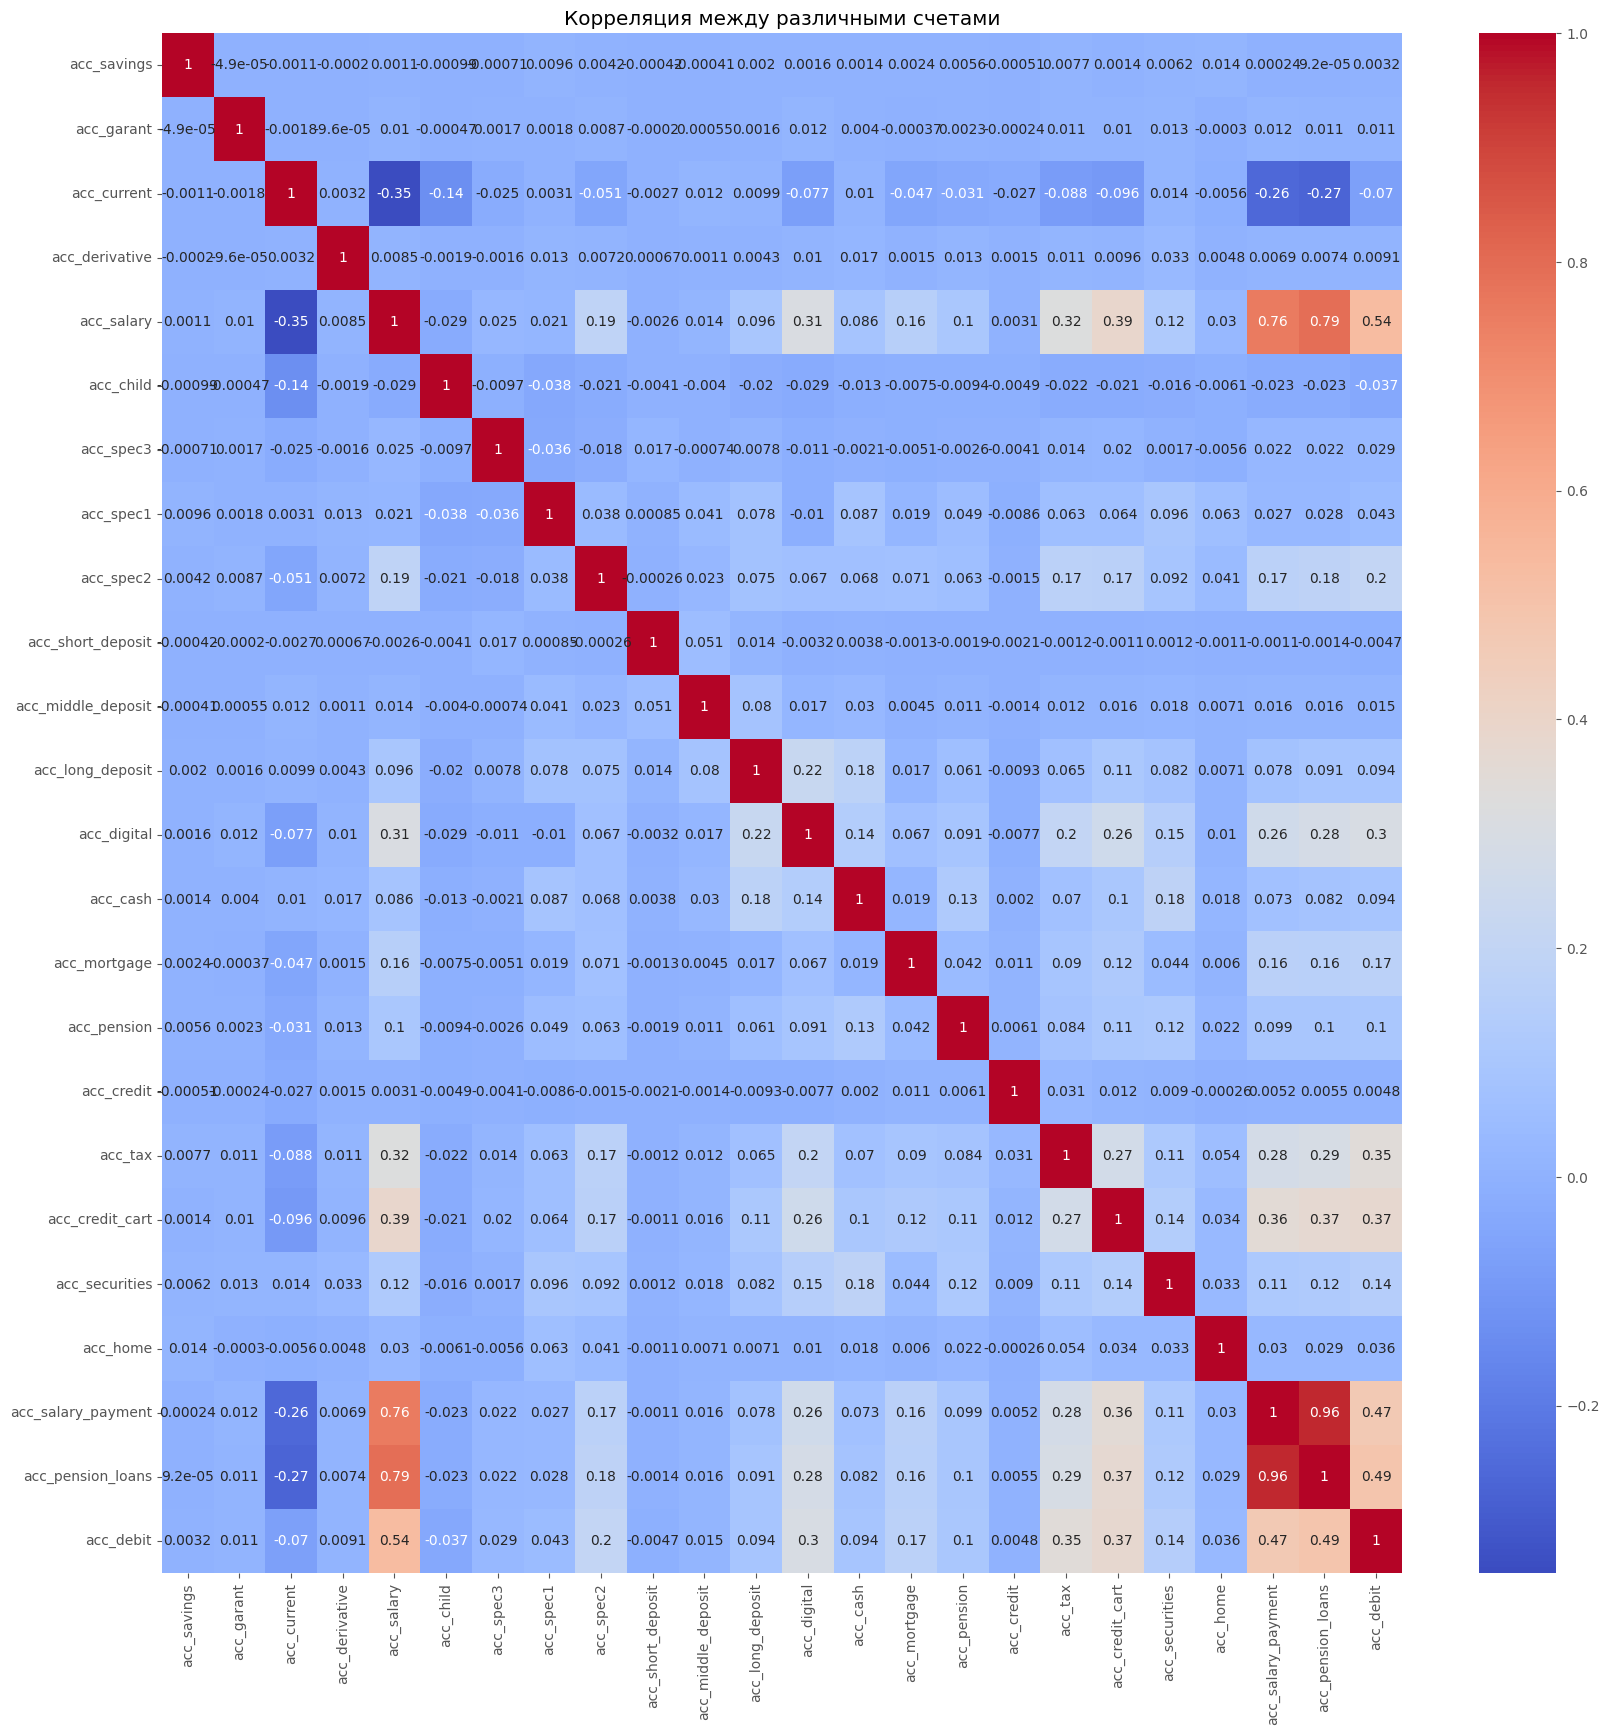

In [39]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data[target_cols].corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Корреляция между различными счетами')
plt.savefig(os.path.join(ASSETS_DIR, 'correlation_target_accounts.png'))
plt.show()


In [12]:
data[target_cols].sum(axis=1).describe()

count    1.361950e+07
mean     1.463104e+00
std      1.514027e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.500000e+01
dtype: float64

Наиболее значимая корреляция прослеживается:  
1) между acc_salary_payment и acc_pension_loans, это связано с тем, что клиент с наличием зарплатных обязательств скорее всего имеет и пенсионные обязательства перед работниками, поэтому заводит второй счет;
2) аналогичная логика справедлива и для связки acc_salary с признаками acc_salary_payment, acc_pension_loans;
3) отрицательная корреляция данных показателей с acc_current связана с тем, что клиенты, использующие продукты банка для получения зарплаты, реже заводят дополнительно текущий счет, т.к. все средства находятся на зарплатном счете.

In [12]:
num_features

['age',
 'work_expirience',
 'income',
 'days_from_first_contract',
 'days_from_premium']

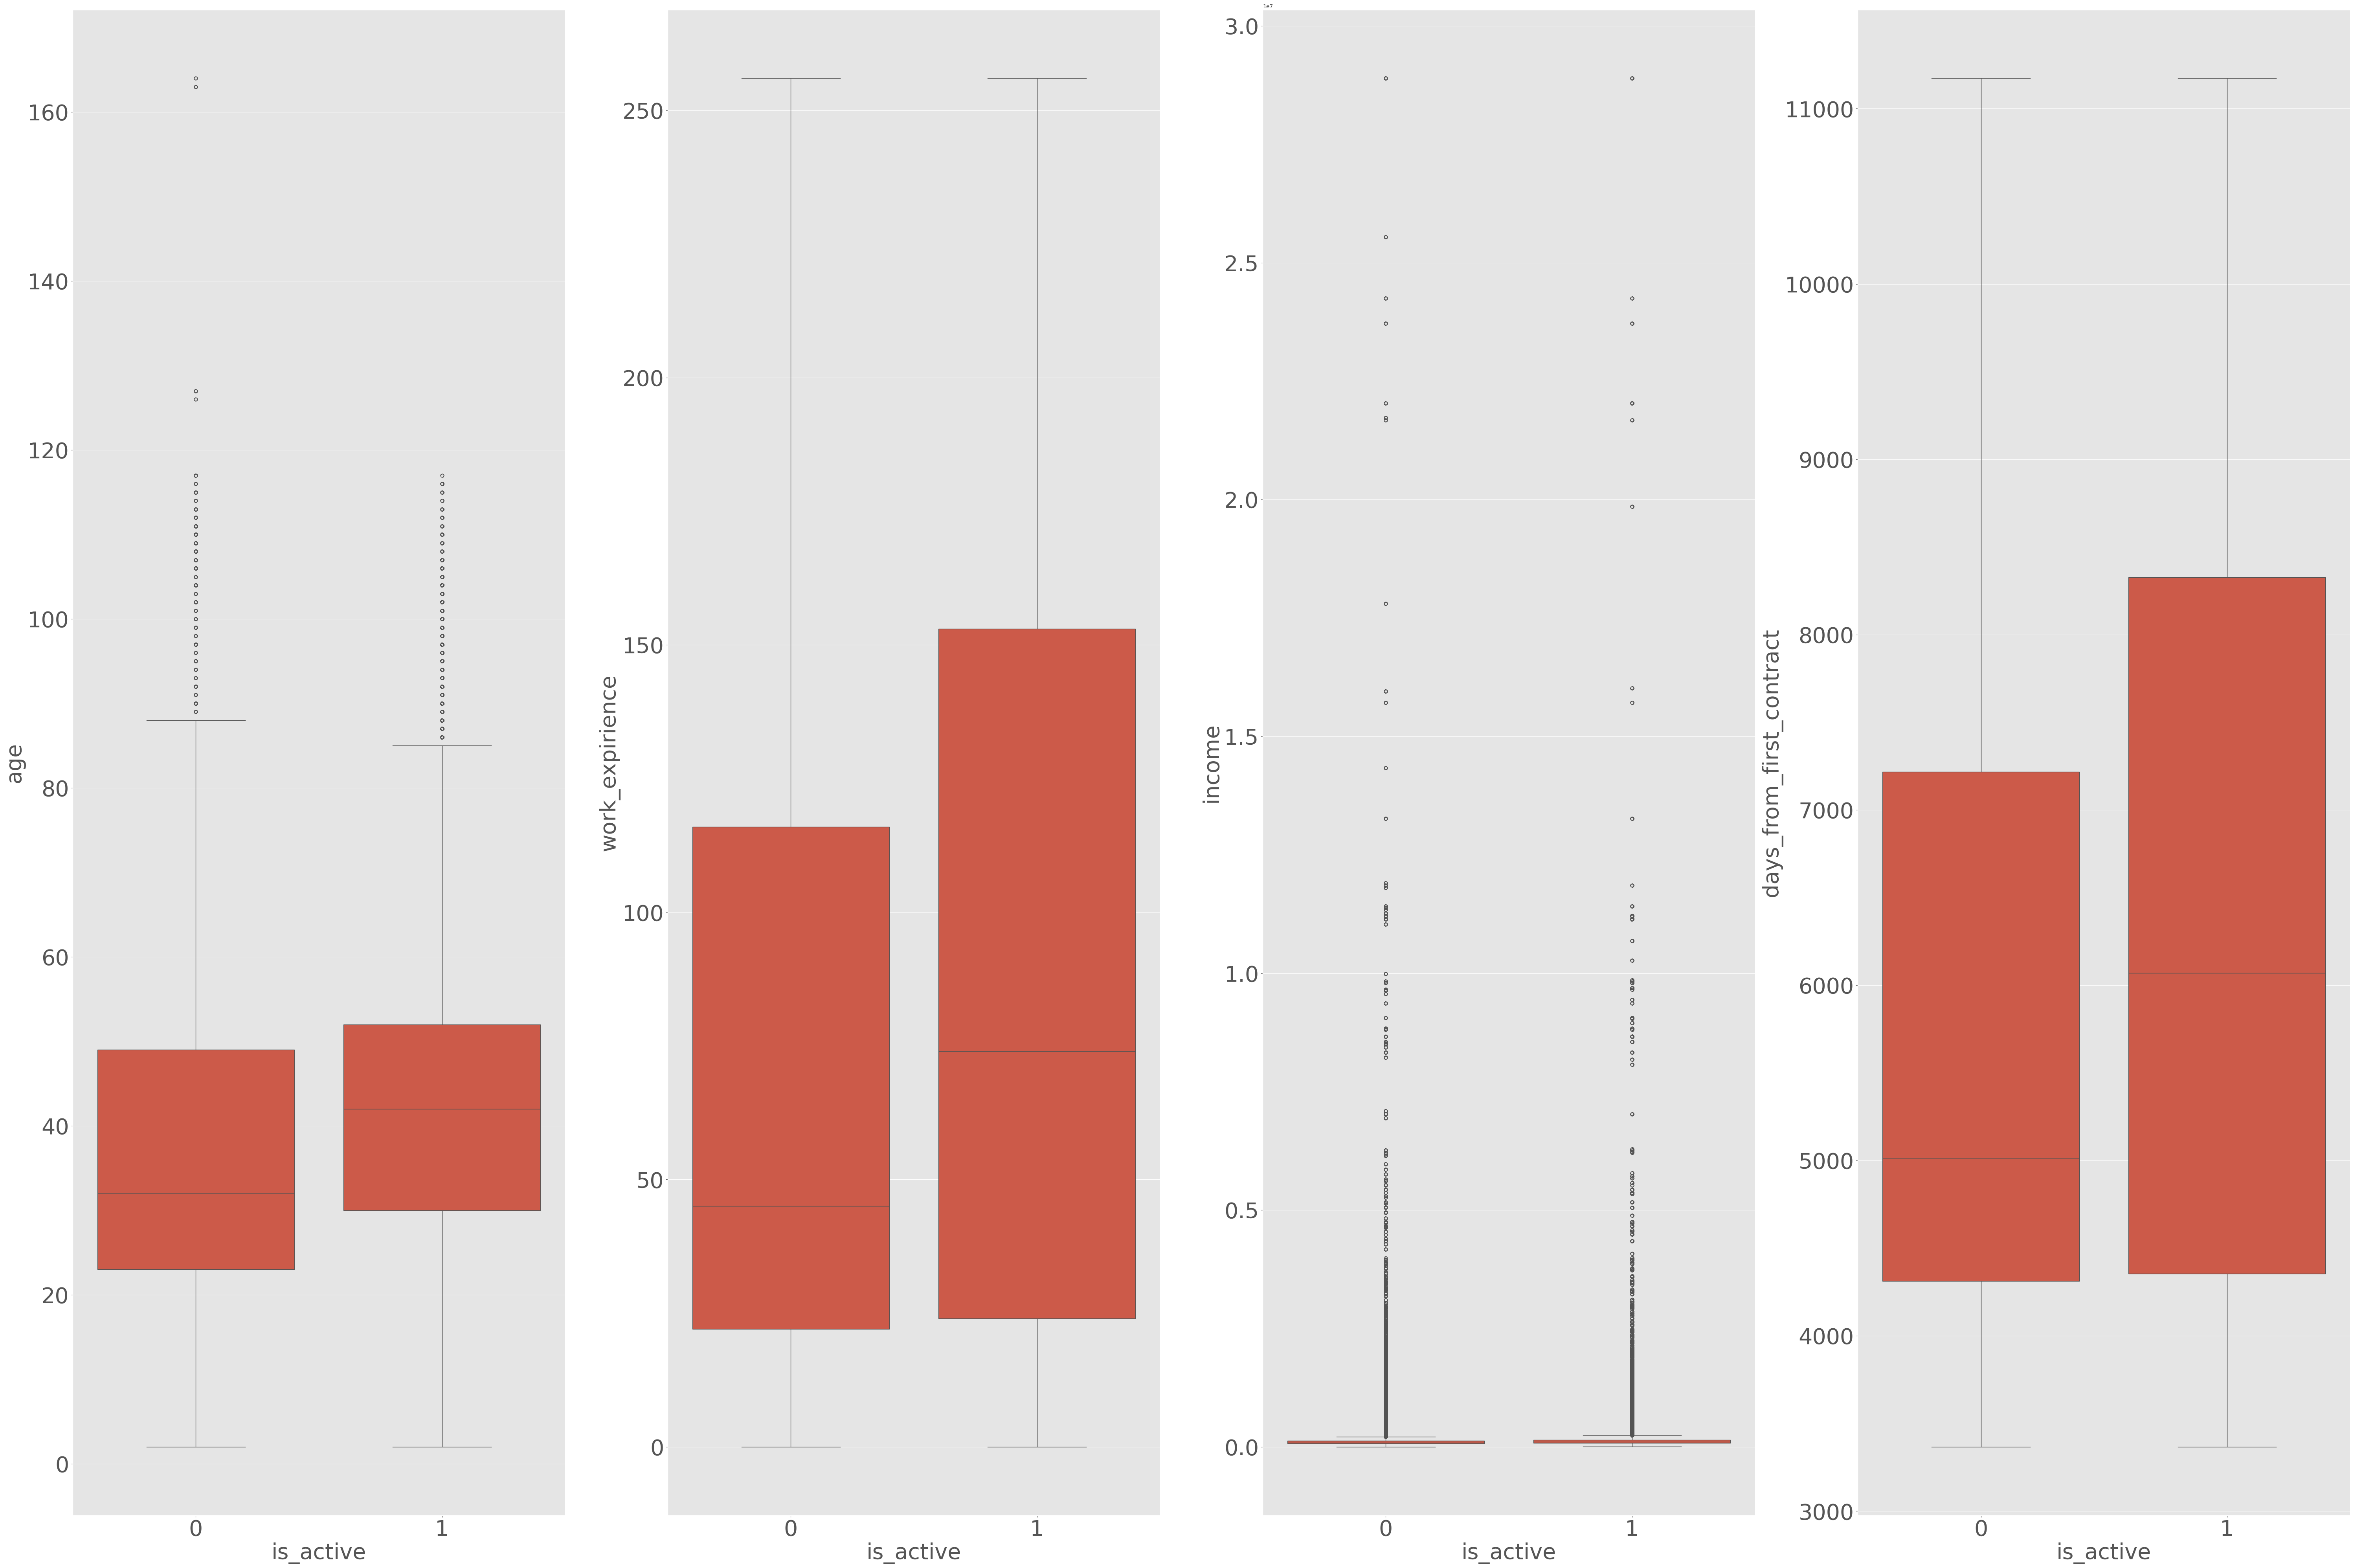

In [38]:
f, axes = plt.subplots(1, 4, figsize=(60, 40))

sns.boxplot(data=data, x='is_active', y='age', ax=axes[0])
sns.boxplot(data=data, x='is_active', y='work_expirience', ax=axes[1])
sns.boxplot(data=data, x='is_active', y='income', ax=axes[2])
sns.boxplot(data=data, x='is_active', y='days_from_first_contract', ax=axes[3])

for ax in axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=40)
    ax.set_ylabel(ax.get_ylabel(), fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)

plt.tight_layout()
plt.savefig(os.path.join(ASSETS_DIR, 'boxplot_is_active.png'))
plt.show()


### Генерация признаков

In [4]:
south_regions = [10, 45, 16, 46, 7, 12, 6, 13, 2, 3, 21, 41, 14, 23, 18, 30, 4, 11, 29, 52, 38, 35]

In [5]:
data['is_capital'] = data['region'].apply(lambda x: 1 if x == 28 else 0)
data['is_barcelona'] = data['region'].apply(lambda x: 1 if x == 8 else 0)
data['is_south'] = data['region'].apply(lambda x: 1 if x in south_regions else 0)

In [6]:
data['acquisition_channel'].value_counts(normalize=True)

acquisition_channel
KHE    2.977546e-01
KAT    2.399653e-01
KFC    2.274943e-01
KHQ    4.339651e-02
KFA    3.007958e-02
           ...     
KDI    1.248210e-06
025    8.076652e-07
KDL    8.076652e-07
KHS    3.671205e-07
KHR    7.342411e-08
Name: proportion, Length: 163, dtype: float64

In [7]:
data['is_KHE'] = data['acquisition_channel'].apply(lambda x: 1 if x == 'KHE' else 0)
data['is_KAT'] = data['acquisition_channel'].apply(lambda x: 1 if x == 'KAT' else 0)
data['is_KFC'] = data['acquisition_channel'].apply(lambda x: 1 if x == 'KFC' else 0)


In [12]:
data['empl_status'] = data['empl_status'].apply(lambda x: 1 if x in ['A', 'F'] else 0)
data['vip_status'] = data['segment'].apply(lambda x: 1 if x == '01 - TOP' else 0)
data['potential_client'] = data['activity_type'].apply(lambda x: 1 if x == 'R' else 0)

In [11]:
data['segment'].value_counts()

segment
02 - PARTICULARES     7960151
03 - UNIVERSITARIO    4935579
01 - TOP               562142
00 - NO SEGMENT        161633
Name: count, dtype: int64

In [13]:
object_features = ['empl_status', 'vip_status', 'potential_client', 'is_KHE', 'is_KAT', 'is_KFC', 'is_capital',
                   'is_barcelona', 'is_south']

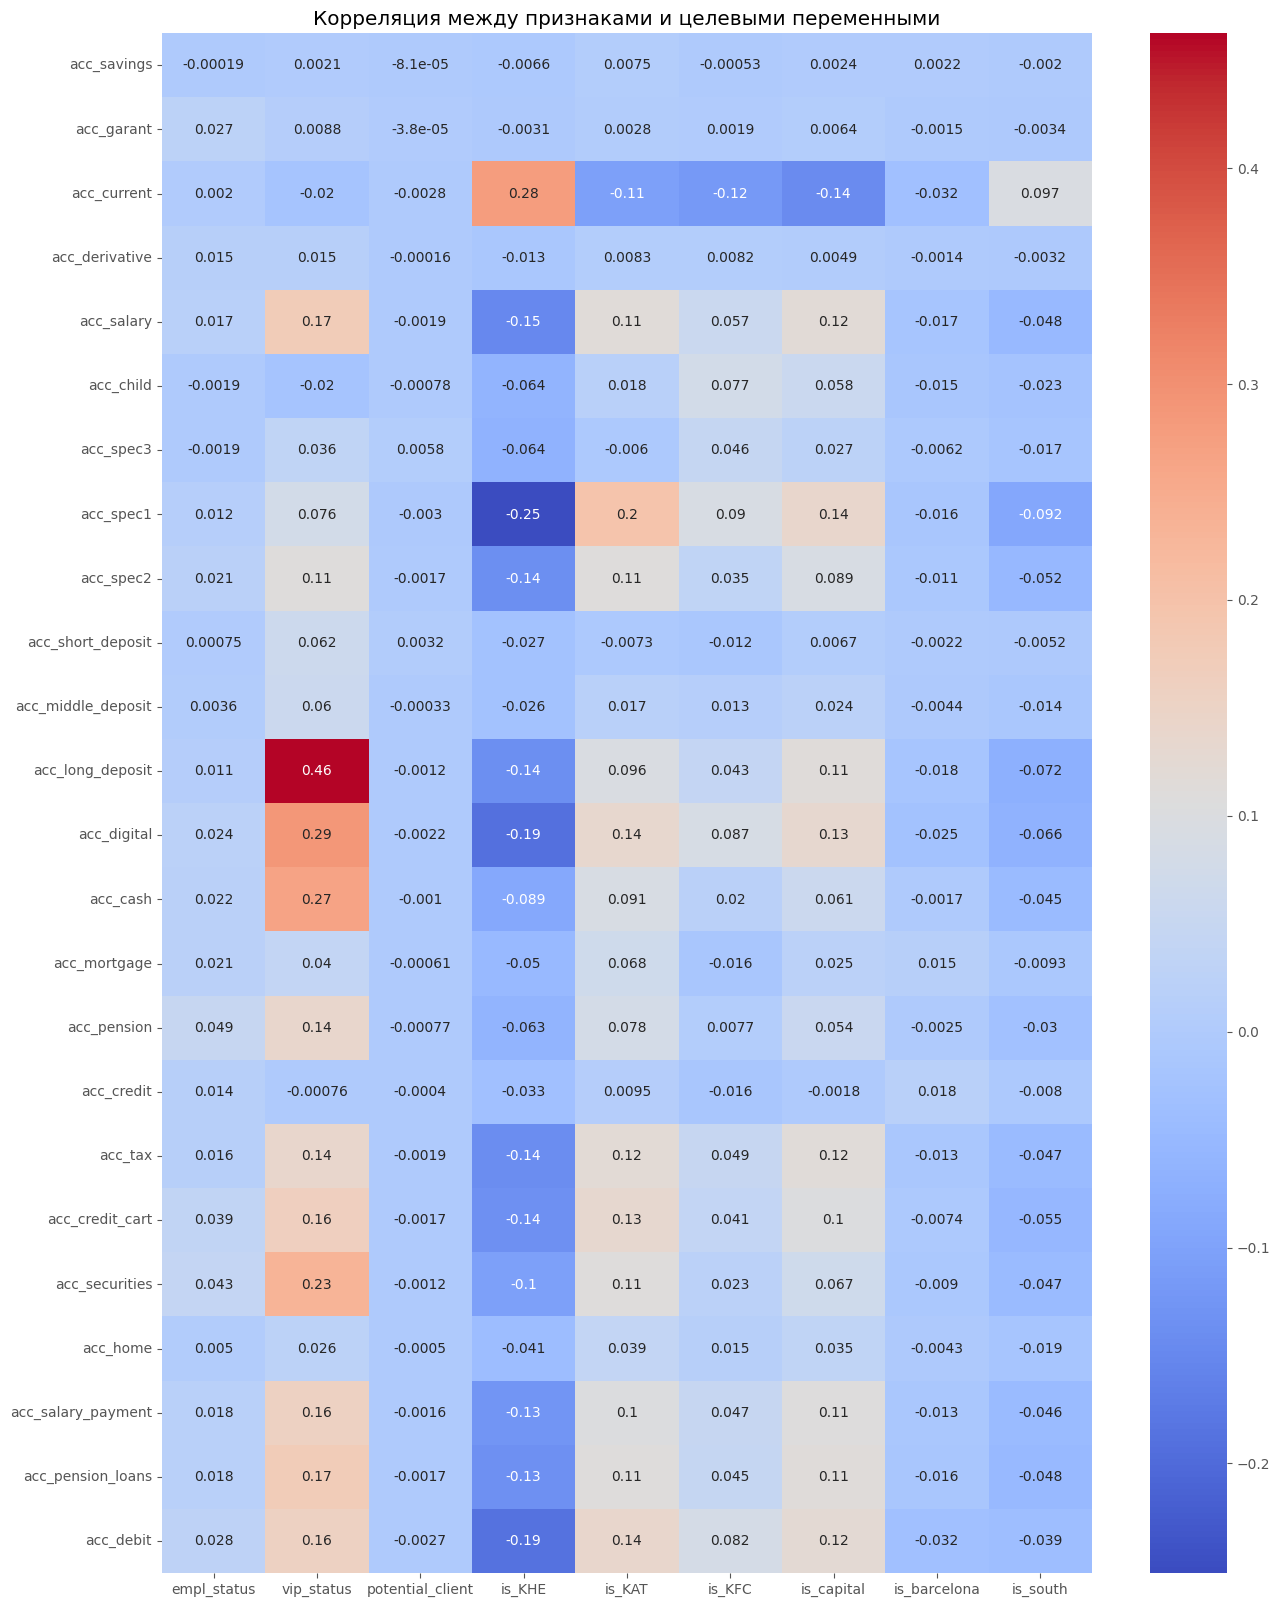

In [37]:
f,ax = plt.subplots(figsize=(15,20))
sns.heatmap(data[object_features + target_cols].corr().loc[[col for col in object_features if col not in target_cols], target_cols].T, annot=True, cmap='coolwarm', ax=ax)
plt.title('Корреляция между признаками и целевыми переменными')
plt.savefig(os.path.join(ASSETS_DIR, 'correlation_object_features.png'))
plt.show()


In [15]:
data['acquisition_channel'].unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', 'KAZ', 'RED', 'KHC',
       'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', 'other',
       'KGC', 'KHF', 'KFK', 'KHN', 'KHA', 'KAF', 'KGX', 'KFD', 'KAG',
       'KFG', 'KAB', 'KCC', 'KAE', 'KAH', 'KAR', 'KFJ', 'KFL', 'KAI',
       'KFU', 'KAQ', 'KFS', 'KAA', 'KFP', 'KAJ', 'KFN', 'KGV', 'KGY',
       'KFF', 'KAP', 'KDE', 'KFV', '013', 'K00', 'KAK', 'KCK', 'KCL',
       'KAY', 'KBU', 'KDR', 'KAC', 'KDT', 'KCG', 'KDO', 'KDY', 'KBQ',
       'KDA', 'KBO', 'KCI', 'KEC', 'KBZ', 'KES', 'KDX', 'KAS', '007',
       'KEU', 'KCA', 'KAL', 'KDC', 'KAW', 'KCS', 'KCB', 'KDU', 'KDQ',
       'KCN', 'KCM', '004', 'KCH', 'KCD', 'KCE', 'KEV', 'KBL', 'KEA',
       'KBH', 'KDV', 'KFT', 'KEY', 'KAO', 'KEJ', 'KEO', 'KEI', 'KEW',
       'KDZ', 'KBV', 'KBR', 'KBF', 'KDP', 'KCO', 'KCF', 'KCV', 'KAM',
       'KEZ', 'KBD', 'KAN', 'KBY', 'KCT', 'KDD', 'KBW', 'KCU', 'KBX',
       'KDB', 'KBS', 'KBE', 'KCX', 'KBP', 'KBN', 'KEB', 'KDS', 'KEL',
       'KDG', 'KDF

Выводы по разделу:

1. Наличие ВИП статуса оказывает сильное влияние на факт наличия большинства банковских продуктов
2. Привлечение клиентов через KHE (через внешних партнеров) и KAT (телефонные звонки) также влияют на покупку тех или иных продуктов. Так, привлечение через KHE коррелирует с наличием текущего счета, т.е. клиенты, пришедщие через внешних партнеров банка замотивированы на заведение текущего счета. Привлечение через телефонные звонки чаще мотивирует людей заводить в банке особый счет первого типа. Без понимания особенностей особого счета сложно оценить взаимосвязь.
3. Наличие связи между is_capital и acc_current свидетельствует о том, что клиенты Мадрида реже заводят текущий счет в банке, чаще отдается предпочтение специализированным счетам.

## Логирование в MLFlow

In [25]:
import mlflow

/home/mle-user/mle-final-project/.venv/lib/python3.10/site-packages/pydantic/_internal/_config.py:373: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [26]:
# константы для логирования в mlflow

EXPERIMENT_NAME = "final_project_bank_alexdem"


os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net"
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID")
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY")

TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5020

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [31]:
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

if experiment is None:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

In [41]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = "eda"

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    
    mlflow.log_artifact("EDA.ipynb")
    mlflow.log_artifacts(ASSETS_DIR)

## Сохранение результатов

In [43]:
data.columns

Index(['div_data', 'client_id', 'empl_status', 'country', 'age',
       'is_last_6m_contract', 'work_expirience', 'is_new_client',
       'client_type', 'activity_type', 'is_resident', 'has_bank_spouse',
       'acquisition_channel', 'is_acc_actual', 'region', 'is_active', 'income',
       'segment', 'acc_savings', 'acc_garant', 'acc_current', 'acc_derivative',
       'acc_salary', 'acc_child', 'acc_spec3', 'acc_spec1', 'acc_spec2',
       'acc_short_deposit', 'acc_middle_deposit', 'acc_long_deposit',
       'acc_digital', 'acc_cash', 'acc_mortgage', 'acc_pension', 'acc_credit',
       'acc_tax', 'acc_credit_cart', 'acc_securities', 'acc_home',
       'acc_salary_payment', 'acc_pension_loans', 'acc_debit',
       'days_from_premium', 'days_from_first_contract', 'is_male',
       'is_capital', 'is_barcelona', 'is_south', 'is_KHE', 'is_KAT', 'is_KFC',
       'vip_status', 'potential_client'],
      dtype='object')

In [49]:
cat_features = [col for col in cat_features if col not in target_cols]

In [ ]:
data[num_features + cat_features + target_cols + object_features + id_col + ['div_data']].to_parquet("bank_products_processed.parquet")

: 